# **BUSINESS CASE 2: SIEMENS ADVANTA SALES FORECASTING**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Goal of the notebook

this notebook is used to predict the market data over 10 months and perform some feature selction in order to build a proper model
- we used a grid search in order to find the best parameter per feature minimising RMSE
- we etract does preidction on a csv calles Market_data_predicted to be called on the model 

# imports

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error



# importing relevant 
from Market_data_prediction_Functions import *

import importlib
imported_module = importlib.import_module("Market_data_prediction_Functions")
importlib.reload(imported_module)


<module 'Market_data_prediction_Functions' from '/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Market_data_prediction_Functions.py'>

In [4]:
df_market = pd.read_csv('../Data/df_market.csv')
info_market = pd.read_csv('../Data/info_market.csv')
filtered_market = pd.read_csv('../Data/filtered_info_market.csv')

In [5]:
# extract a list of index codes that were find relevant in the preevious notebook
index_codes = filtered_market["Index Code"].tolist()
# only select the columns that were find relevant
df_market = df_market[["date"]+ index_codes]
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                219 non-null    object 
 1   MAB_ELE_PRO156      219 non-null    float64
 2   MAB_ELE_SHP156      219 non-null    float64
 3   MAB_ELE_SHP250      219 non-null    float64
 4   MAB_ELE_PRO392      219 non-null    float64
 5   MAB_ELE_SHP392      219 non-null    float64
 6   MAB_ELE_PRO756      219 non-null    float64
 7   MAB_ELE_SHP756      219 non-null    float64
 8   MAB_ELE_PRO826      219 non-null    float64
 9   MAB_ELE_SHP826      219 non-null    float64
 10  MAB_ELE_SHP840      219 non-null    float64
 11  RohiMETMIN1000_org  219 non-null    float64
 12  RohCOPPER1000_org   219 non-null    float64
 13  WKLWEUR840_org      219 non-null    float64
 14  PRI27840_org        219 non-null    float64
 15  PRI27380_org        219 non-null    float64
 16  PRI27250

In [6]:
df_market.isna().sum()


date                  0
MAB_ELE_PRO156        0
MAB_ELE_SHP156        0
MAB_ELE_SHP250        0
MAB_ELE_PRO392        0
MAB_ELE_SHP392        0
MAB_ELE_PRO756        0
MAB_ELE_SHP756        0
MAB_ELE_PRO826        0
MAB_ELE_SHP826        0
MAB_ELE_SHP840        0
RohiMETMIN1000_org    0
RohCOPPER1000_org     0
WKLWEUR840_org        0
PRI27840_org          0
PRI27380_org          0
PRI27250_org          0
PRI27276_org          0
PRO28756_org          0
PRO28392_org          0
PRO271000_org         0
PRO27756_org          0
PRO27826_org          0
PRO27392_org          0
PRO27276_org          0
dtype: int64

# market data prediction

## Grid-Search


In [7]:
# Run the grid search on all features in your market_df (which should already be defined)
grid_search_results = grid_search_all_features(df_market, date_column='date', forecast_horizon=10)

# Optionally, print out the complete grid search results for further analysis
print("\nComplete Grid Search Results:")
for feature, result in grid_search_results.items():
    print(f"\nFeature: {feature}")
    print(result)


14:34:16 - cmdstanpy - INFO - Chain [1] start processing
14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:16 - cmdstanpy - INFO - Chain [1] start processing
14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:16 - cmdstanpy - INFO - Chain [1] start processing
14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:16 - cmdstanpy - INFO - Chain [1] start processing
14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:16 - cmdstanpy - INFO - Chain [1] start processing
14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:16 - cmdstanpy - INFO - Chain [1] start processing
14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:16 - cmdstanpy - INFO - Chain [1] start processing
14:34:16 - cmdstanpy - INFO - Chain [1] done processing
14:34:17 - cmdstanpy - INFO - Chain [1] start processing
14:34:17 - cmdstanpy - INFO - Chain [1] done processing
14:34:17 - cmdstanpy - INFO - Chain [1] start processing
14:34:17 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_PRO156 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0} | RMSE: 12.5164


14:34:17 - cmdstanpy - INFO - Chain [1] start processing
14:34:17 - cmdstanpy - INFO - Chain [1] done processing
14:34:17 - cmdstanpy - INFO - Chain [1] start processing
14:34:17 - cmdstanpy - INFO - Chain [1] done processing
14:34:17 - cmdstanpy - INFO - Chain [1] start processing
14:34:17 - cmdstanpy - INFO - Chain [1] done processing
14:34:17 - cmdstanpy - INFO - Chain [1] start processing
14:34:17 - cmdstanpy - INFO - Chain [1] done processing
14:34:17 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_SHP156 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0} | RMSE: 12.5164


14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:18 - cmdstanpy - INFO - Chain [1] done processing
14:34:18 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP250 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 9.9337


14:34:19 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:19 - cmdstanpy - INFO - Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1] done processing
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
14:34:20 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_PRO392 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 14.9471


14:34:21 - cmdstanpy - INFO - Chain [1] start processing
14:34:21 - cmdstanpy - INFO - Chain [1] done processing
14:34:21 - cmdstanpy - INFO - Chain [1] start processing
14:34:21 - cmdstanpy - INFO - Chain [1] done processing
14:34:21 - cmdstanpy - INFO - Chain [1] start processing
14:34:21 - cmdstanpy - INFO - Chain [1] done processing
14:34:21 - cmdstanpy - INFO - Chain [1] start processing
14:34:21 - cmdstanpy - INFO - Chain [1] done processing
14:34:21 - cmdstanpy - INFO - Chain [1] start processing
14:34:21 - cmdstanpy - INFO - Chain [1] done processing
14:34:21 - cmdstanpy - INFO - Chain [1] start processing
14:34:21 - cmdstanpy - INFO - Chain [1] done processing
14:34:21 - cmdstanpy - INFO - Chain [1] start processing
14:34:21 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing
14:34:22 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing
14:34:22 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_SHP392 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 14.9510


14:34:22 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing
14:34:22 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing
14:34:22 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing
14:34:22 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing
14:34:22 - cmdstanpy - INFO - Chain [1] done processing
14:34:22 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing
14:34:23 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing
14:34:23 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing
14:34:23 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing
14:34:23 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_PRO756 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 8.0152


14:34:23 - cmdstanpy - INFO - Chain [1] done processing
14:34:23 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing
14:34:23 - cmdstanpy - INFO - Chain [1] start processing
14:34:23 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] start processing
14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] start processing
14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] start processing
14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] start processing
14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] start processing
14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] start processing
14:34:24 - cmdstanpy - INFO - Chain [1] done processing
14:34:24 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP756 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 7.9478


14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:25 - cmdstanpy - INFO - Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_PRO826 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 5.9753


14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:26 - cmdstanpy - INFO - Chain [1] done processing
14:34:26 - cmdstanpy - INFO - Chain [1] start processing
14:34:27 - cmdstanpy - INFO - Chain [1] done processing
14:34:27 - cmdstanpy - INFO - Chain [1] start processing
14:34:27 - cmdstanpy - INFO - Chain [1] done processing
14:34:27 - cmdstanpy - INFO - Chain [1] start processing
14:34:27 - cmdstanpy - INFO - Chain [1] done processing
14:34:27 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP826 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 7.8705


14:34:27 - cmdstanpy - INFO - Chain [1] start processing
14:34:27 - cmdstanpy - INFO - Chain [1] done processing
14:34:27 - cmdstanpy - INFO - Chain [1] start processing
14:34:27 - cmdstanpy - INFO - Chain [1] done processing
14:34:27 - cmdstanpy - INFO - Chain [1] start processing
14:34:27 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_SHP840 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 8.0707


14:34:28 - cmdstanpy - INFO - Chain [1] start processing
14:34:28 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing
14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing
14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing
14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing
14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing
14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing
14:34:29 - cmdstanpy - INFO - Chain [1] done processing
14:34:29 - cmdstanpy - INFO - Chain [1] start processing
14:34:30 - cmdstanpy - INFO - Chain [1] done processing
14:34:30 - cmdstanpy - INFO - Chain [1] start processing
14:34:30 - cmdstanpy - INFO - Chain [1]

Feature: RohiMETMIN1000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.5} | RMSE: 27.4670


14:34:30 - cmdstanpy - INFO - Chain [1] start processing
14:34:30 - cmdstanpy - INFO - Chain [1] done processing
14:34:30 - cmdstanpy - INFO - Chain [1] start processing
14:34:30 - cmdstanpy - INFO - Chain [1] done processing
14:34:30 - cmdstanpy - INFO - Chain [1] start processing
14:34:30 - cmdstanpy - INFO - Chain [1] done processing
14:34:30 - cmdstanpy - INFO - Chain [1] start processing
14:34:30 - cmdstanpy - INFO - Chain [1] done processing
14:34:30 - cmdstanpy - INFO - Chain [1] start processing
14:34:30 - cmdstanpy - INFO - Chain [1] done processing
14:34:30 - cmdstanpy - INFO - Chain [1] start processing
14:34:30 - cmdstanpy - INFO - Chain [1] done processing
14:34:31 - cmdstanpy - INFO - Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1] done processing
14:34:31 - cmdstanpy - INFO - Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1] done processing
14:34:31 - cmdstanpy - INFO - Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1]

Feature: RohCOPPER1000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.5} | RMSE: 27.5758


14:34:31 - cmdstanpy - INFO - Chain [1] done processing
14:34:31 - cmdstanpy - INFO - Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1] done processing
14:34:31 - cmdstanpy - INFO - Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1] done processing
14:34:31 - cmdstanpy - INFO - Chain [1] start processing
14:34:32 - cmdstanpy - INFO - Chain [1] done processing
14:34:32 - cmdstanpy - INFO - Chain [1] start processing
14:34:32 - cmdstanpy - INFO - Chain [1] done processing
14:34:32 - cmdstanpy - INFO - Chain [1] start processing
14:34:32 - cmdstanpy - INFO - Chain [1] done processing
14:34:32 - cmdstanpy - INFO - Chain [1] start processing
14:34:32 - cmdstanpy - INFO - Chain [1] done processing
14:34:32 - cmdstanpy - INFO - Chain [1] start processing
14:34:32 - cmdstanpy - INFO - Chain [1] done processing
14:34:32 - cmdstanpy - INFO - Chain [1] start processing
14:34:32 - cmdstanpy - INFO - Chain [1] done processing
14:34:32 - cmdstanpy - INFO - Chain [1] 

Feature: WKLWEUR840_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 5.0} | RMSE: 0.0350


14:34:33 - cmdstanpy - INFO - Chain [1] done processing
14:34:33 - cmdstanpy - INFO - Chain [1] start processing
14:34:33 - cmdstanpy - INFO - Chain [1] done processing
14:34:33 - cmdstanpy - INFO - Chain [1] start processing
14:34:33 - cmdstanpy - INFO - Chain [1] done processing
14:34:33 - cmdstanpy - INFO - Chain [1] start processing
14:34:33 - cmdstanpy - INFO - Chain [1] done processing
14:34:33 - cmdstanpy - INFO - Chain [1] start processing
14:34:33 - cmdstanpy - INFO - Chain [1] done processing
14:34:33 - cmdstanpy - INFO - Chain [1] start processing
14:34:33 - cmdstanpy - INFO - Chain [1] done processing
14:34:33 - cmdstanpy - INFO - Chain [1] start processing
14:34:33 - cmdstanpy - INFO - Chain [1] done processing
14:34:33 - cmdstanpy - INFO - Chain [1] start processing
14:34:33 - cmdstanpy - INFO - Chain [1] done processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] done processing
14:34:34 - cmdstanpy - INFO - Chain [1] 

Feature: PRI27840_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 13.1037


14:34:34 - cmdstanpy - INFO - Chain [1] done processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] done processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] done processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:34 - cmdstanpy - INFO - Chain [1] done processing
14:34:34 - cmdstanpy - INFO - Chain [1] start processing
14:34:35 - cmdstanpy - INFO - Chain [1] done processing
14:34:35 - cmdstanpy - INFO - Chain [1] start processing
14:34:35 - cmdstanpy - INFO - Chain [1] done processing
14:34:35 - cmdstanpy - INFO - Chain [1] start processing
14:34:35 - cmdstanpy - INFO - Chain [1] done processing
14:34:35 - cmdstanpy - INFO - Chain [1] start processing
14:34:35 - cmdstanpy - INFO - Chain [1] done processing
14:34:35 - cmdstanpy - INFO - Chain [1] start processing
14:34:35 - cmdstanpy - INFO - Chain [1] done processing
14:34:35 - cmdstanpy - INFO - Chain [1] 

Feature: PRI27380_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 7.7346


14:34:35 - cmdstanpy - INFO - Chain [1] start processing
14:34:35 - cmdstanpy - INFO - Chain [1] done processing
14:34:35 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:36 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:36 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:36 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:36 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:36 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:36 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:36 - cmdstanpy - INFO - Chain [1] start processing
14:34:36 - cmdstanpy - INFO - Chain [1]

Feature: PRI27250_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0} | RMSE: 2.1005


14:34:36 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] 

Feature: PRI27276_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 4.5704


14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] start processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] start processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] start processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] start processing
14:34:38 - cmdstanpy - INFO - Chain [1] done processing
14:34:38 - cmdstanpy - INFO - Chain [1] start processing
14:34:39 - cmdstanpy - INFO - Chain [1] done processing
14:34:39 - cmdstanpy - INFO - Chain [1] start processing
14:34:39 - cmdstanpy - INFO - Chain [1] done processing
14:34:39 - cmdstanpy - INFO - Chain [1] start processing
14:34:39 - cmdstanpy - INFO - Chain [1] done processing
14:34:39 - cmdstanpy - INFO - Chain [1] start processing
14:34:39 - cmdstanpy - INFO - Chain [1] done processing
14:34:39 - cmdstanpy - INFO - Chain [1] 

Feature: PRO28756_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 10.0930


14:34:39 - cmdstanpy - INFO - Chain [1] start processing
14:34:39 - cmdstanpy - INFO - Chain [1] done processing
14:34:39 - cmdstanpy - INFO - Chain [1] start processing
14:34:39 - cmdstanpy - INFO - Chain [1] done processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] done processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] done processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] done processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] done processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:40 - cmdstanpy - INFO - Chain [1] done processing
14:34:40 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1]

Feature: PRO28392_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 19.2535


14:34:41 - cmdstanpy - INFO - Chain [1] done processing
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 - cmdstanpy - INFO - Chain [1] 

Feature: PRO271000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 5.1383


14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:42 - cmdstanpy - INFO - Chain [1] start processing
14:34:42 - cmdstanpy - INFO - Chain [1] done processing
14:34:43 - cmdstanpy - INFO - Chain [1] start processing
14:34:43 - cmdstanpy - INFO - Chain [1] done processing
14:34:43 - cmdstanpy - INFO - Chain [1] start processing
14:34:43 - cmdstanpy - INFO - Chain [1] done processing
14:34:43 - cmdstanpy - INFO - Chain [1] start processing
14:34:43 - cmdstanpy - INFO - Chain [1] done processing
14:34:43 - cmdstanpy - INFO - Chain [1] start processing
14:34:43 - cmdstanpy - INFO - Chain [1] done processing
14:34:43 - cmdstanpy - INFO - Chain [1] start processing
14:34:43 - cmdstanpy - INFO - Chain [1] done processing
14:34:43 - cmdstanpy - INFO - Chain [1] 

Feature: PRO27756_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 4.3838


14:34:43 - cmdstanpy - INFO - Chain [1] start processing
14:34:43 - cmdstanpy - INFO - Chain [1] done processing
14:34:43 - cmdstanpy - INFO - Chain [1] start processing
14:34:43 - cmdstanpy - INFO - Chain [1] done processing
14:34:44 - cmdstanpy - INFO - Chain [1] start processing
14:34:44 - cmdstanpy - INFO - Chain [1] done processing
14:34:44 - cmdstanpy - INFO - Chain [1] start processing
14:34:44 - cmdstanpy - INFO - Chain [1] done processing
14:34:44 - cmdstanpy - INFO - Chain [1] start processing
14:34:44 - cmdstanpy - INFO - Chain [1] done processing
14:34:44 - cmdstanpy - INFO - Chain [1] start processing
14:34:44 - cmdstanpy - INFO - Chain [1] done processing
14:34:44 - cmdstanpy - INFO - Chain [1] start processing
14:34:44 - cmdstanpy - INFO - Chain [1] done processing
14:34:44 - cmdstanpy - INFO - Chain [1] start processing
14:34:44 - cmdstanpy - INFO - Chain [1] done processing
14:34:44 - cmdstanpy - INFO - Chain [1] start processing
14:34:44 - cmdstanpy - INFO - Chain [1]

Feature: PRO27826_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 5.9730


14:34:45 - cmdstanpy - INFO - Chain [1] done processing
14:34:45 - cmdstanpy - INFO - Chain [1] start processing
14:34:45 - cmdstanpy - INFO - Chain [1] done processing
14:34:45 - cmdstanpy - INFO - Chain [1] start processing
14:34:45 - cmdstanpy - INFO - Chain [1] done processing
14:34:45 - cmdstanpy - INFO - Chain [1] start processing
14:34:45 - cmdstanpy - INFO - Chain [1] done processing
14:34:45 - cmdstanpy - INFO - Chain [1] start processing
14:34:45 - cmdstanpy - INFO - Chain [1] done processing
14:34:45 - cmdstanpy - INFO - Chain [1] start processing
14:34:45 - cmdstanpy - INFO - Chain [1] done processing
14:34:45 - cmdstanpy - INFO - Chain [1] start processing
14:34:45 - cmdstanpy - INFO - Chain [1] done processing
14:34:45 - cmdstanpy - INFO - Chain [1] start processing
14:34:46 - cmdstanpy - INFO - Chain [1] done processing
14:34:46 - cmdstanpy - INFO - Chain [1] start processing
14:34:46 - cmdstanpy - INFO - Chain [1] done processing
14:34:46 - cmdstanpy - INFO - Chain [1] 

Feature: PRO27392_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 6.3997


14:34:46 - cmdstanpy - INFO - Chain [1] start processing
14:34:46 - cmdstanpy - INFO - Chain [1] done processing
14:34:46 - cmdstanpy - INFO - Chain [1] start processing
14:34:46 - cmdstanpy - INFO - Chain [1] done processing
14:34:46 - cmdstanpy - INFO - Chain [1] start processing
14:34:46 - cmdstanpy - INFO - Chain [1] done processing
14:34:46 - cmdstanpy - INFO - Chain [1] start processing
14:34:46 - cmdstanpy - INFO - Chain [1] done processing
14:34:46 - cmdstanpy - INFO - Chain [1] start processing
14:34:46 - cmdstanpy - INFO - Chain [1] done processing
14:34:47 - cmdstanpy - INFO - Chain [1] start processing
14:34:47 - cmdstanpy - INFO - Chain [1] done processing
14:34:47 - cmdstanpy - INFO - Chain [1] start processing
14:34:47 - cmdstanpy - INFO - Chain [1] done processing
14:34:47 - cmdstanpy - INFO - Chain [1] start processing
14:34:47 - cmdstanpy - INFO - Chain [1] done processing


Feature: PRO27276_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 8.9131

Complete Grid Search Results:

Feature: MAB_ELE_PRO156
{'best_params': {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0}, 'best_rmse': np.float64(12.516422305129543), 'param_results': [{'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2, 'rmse': np.float64(12.766008780036382)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.5, 'rmse': np.float64(12.801445721975039)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'rmse': np.float64(12.790778460610085)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 2.0, 'rmse': np.float64(12.702961178636663)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0, 'rmse': np.float64(12.516422305129543)}, {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2, 'rmse': np.float64(15.858846272141713)}, {'se

## final prediction

14:34:47 - cmdstanpy - INFO - Chain [1] start processing
14:34:47 - cmdstanpy - INFO - Chain [1] done processing


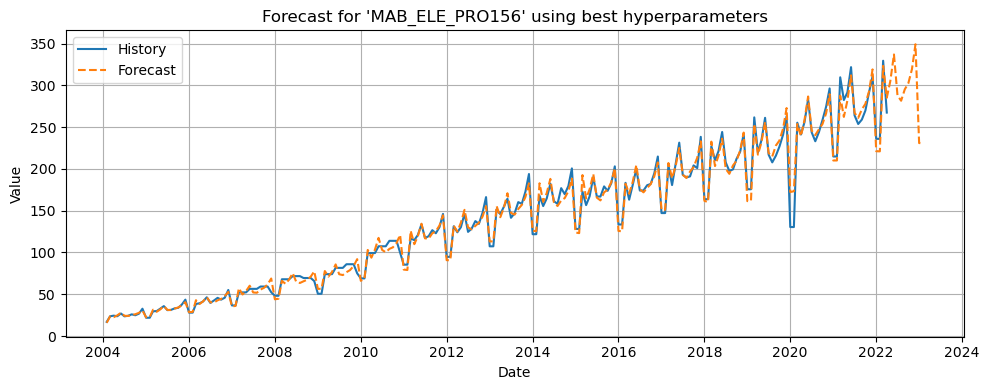

14:34:47 - cmdstanpy - INFO - Chain [1] start processing
14:34:47 - cmdstanpy - INFO - Chain [1] done processing


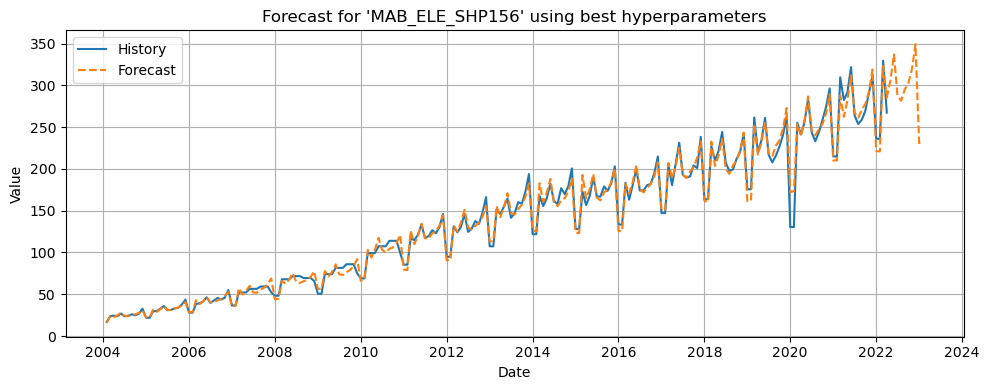

14:34:48 - cmdstanpy - INFO - Chain [1] start processing
14:34:48 - cmdstanpy - INFO - Chain [1] done processing


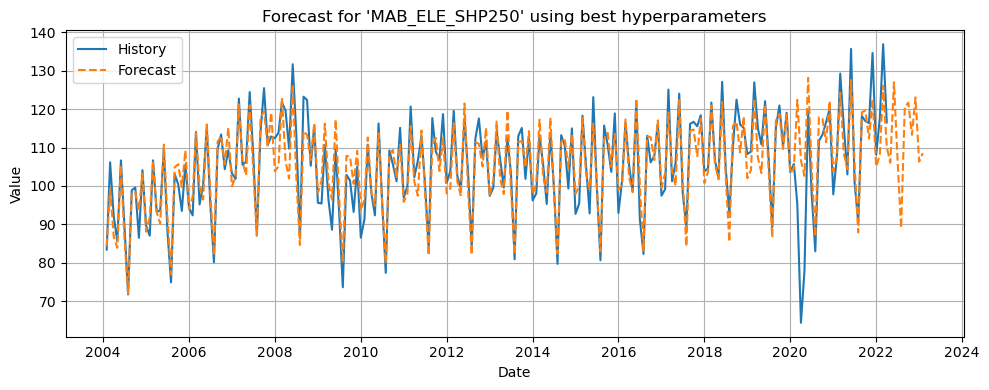

14:34:48 - cmdstanpy - INFO - Chain [1] start processing
14:34:48 - cmdstanpy - INFO - Chain [1] done processing


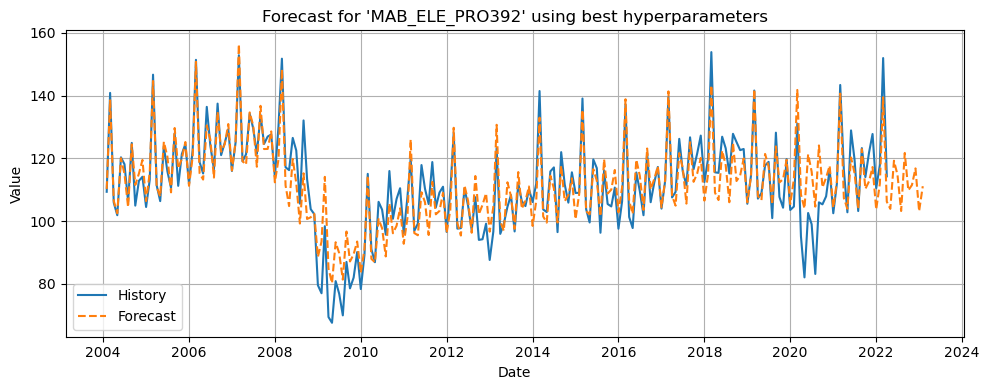

14:34:48 - cmdstanpy - INFO - Chain [1] start processing
14:34:48 - cmdstanpy - INFO - Chain [1] done processing


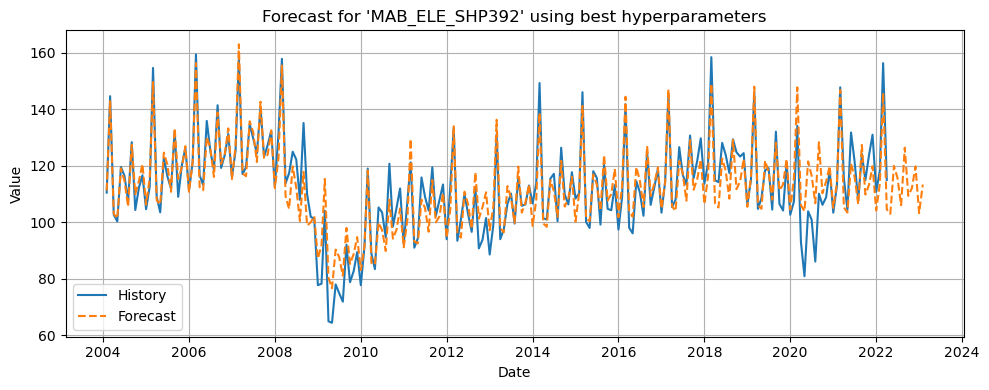

14:34:48 - cmdstanpy - INFO - Chain [1] start processing
14:34:48 - cmdstanpy - INFO - Chain [1] done processing


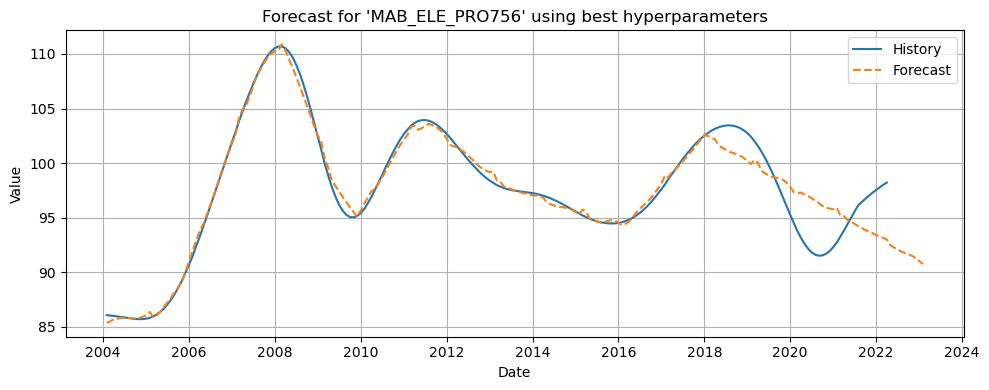

14:34:48 - cmdstanpy - INFO - Chain [1] start processing
14:34:49 - cmdstanpy - INFO - Chain [1] done processing


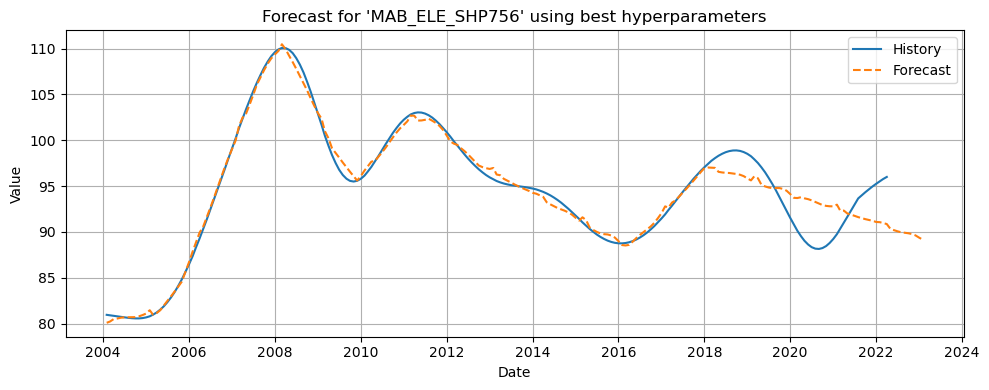

14:34:49 - cmdstanpy - INFO - Chain [1] start processing
14:34:49 - cmdstanpy - INFO - Chain [1] done processing


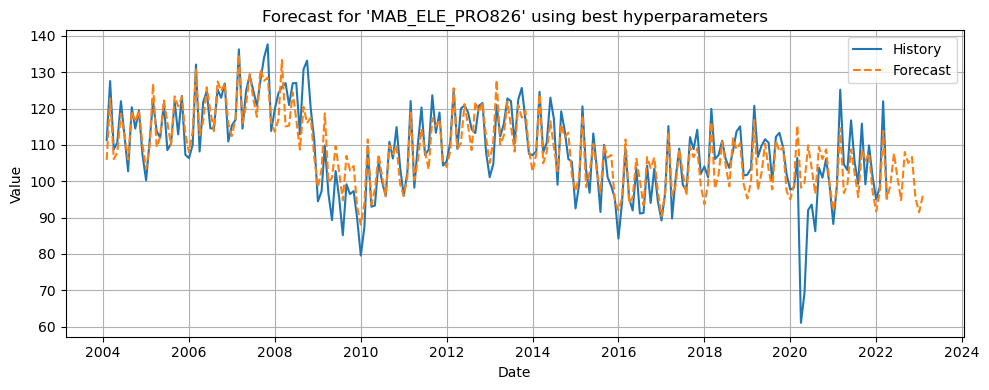

14:34:49 - cmdstanpy - INFO - Chain [1] start processing
14:34:49 - cmdstanpy - INFO - Chain [1] done processing


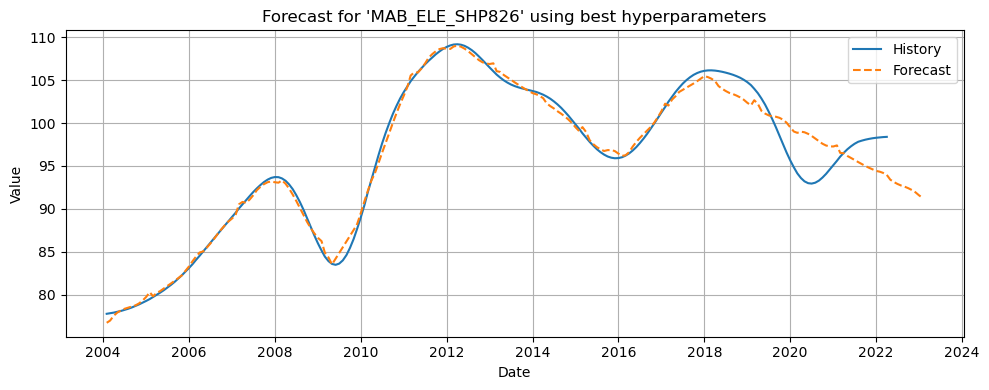

14:34:49 - cmdstanpy - INFO - Chain [1] start processing
14:34:49 - cmdstanpy - INFO - Chain [1] done processing


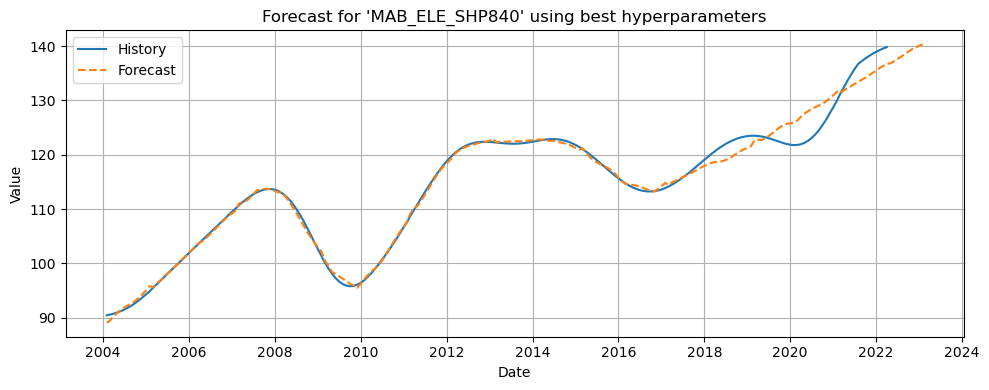

14:34:49 - cmdstanpy - INFO - Chain [1] start processing
14:34:49 - cmdstanpy - INFO - Chain [1] done processing


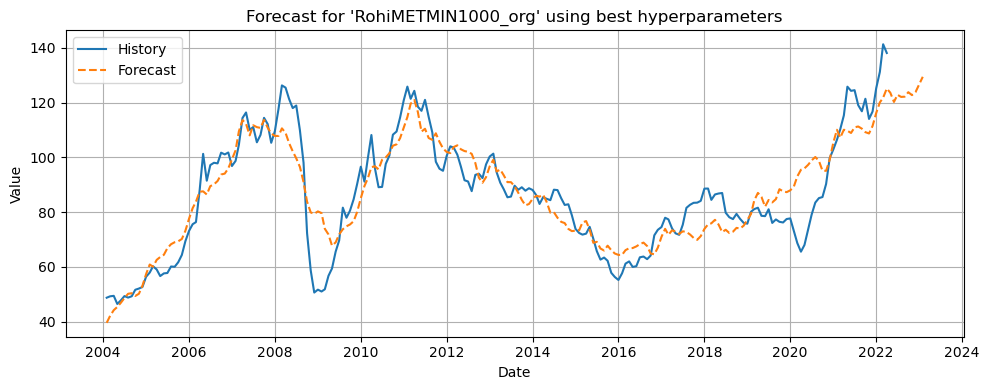

14:34:50 - cmdstanpy - INFO - Chain [1] start processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing


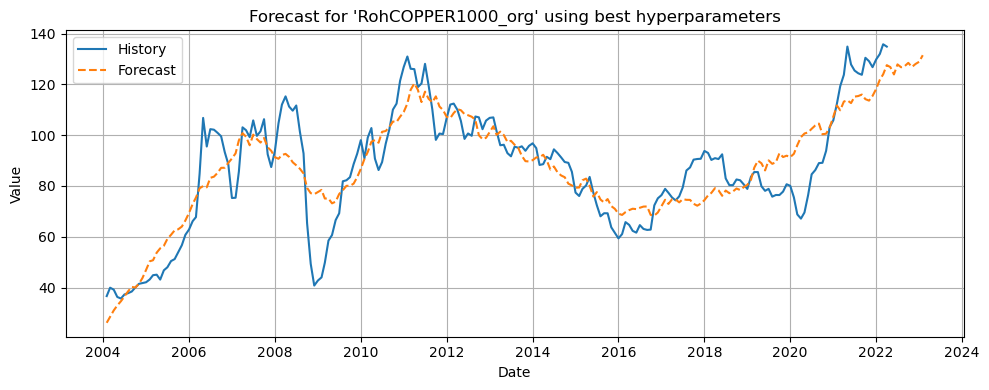

14:34:50 - cmdstanpy - INFO - Chain [1] start processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing


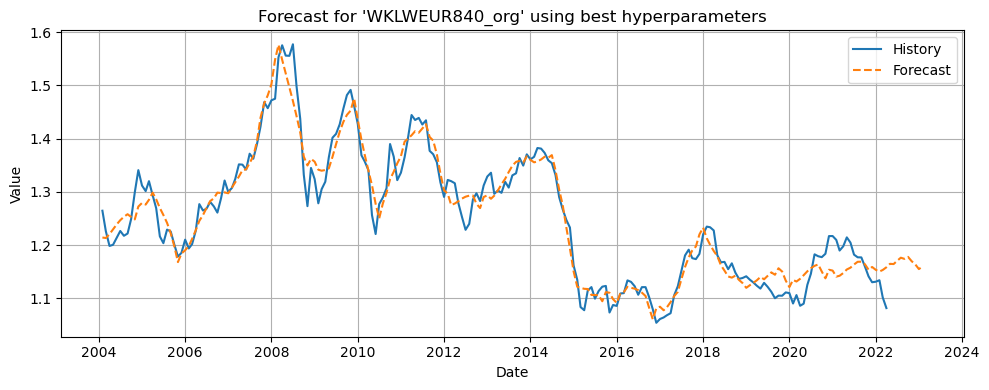

14:34:50 - cmdstanpy - INFO - Chain [1] start processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing


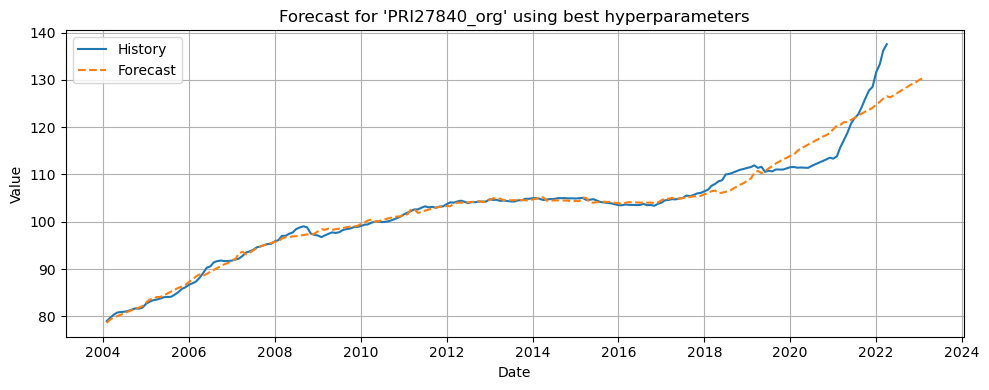

14:34:50 - cmdstanpy - INFO - Chain [1] start processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing


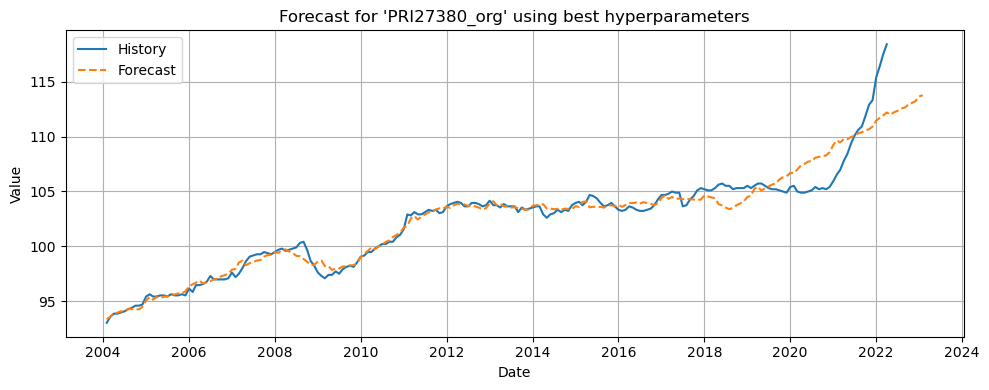

14:34:50 - cmdstanpy - INFO - Chain [1] start processing
14:34:50 - cmdstanpy - INFO - Chain [1] done processing


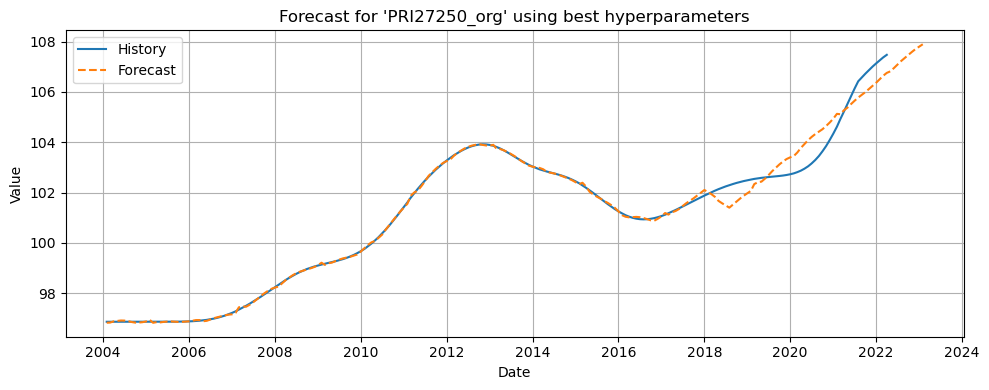

14:34:51 - cmdstanpy - INFO - Chain [1] start processing
14:34:51 - cmdstanpy - INFO - Chain [1] done processing


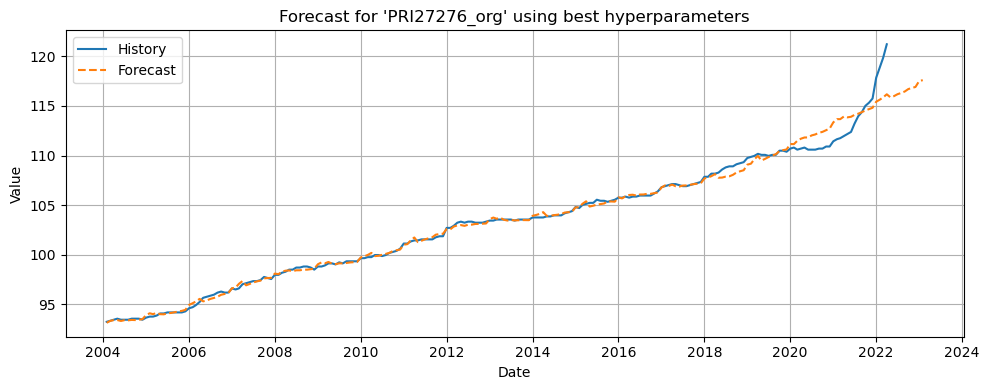

14:34:51 - cmdstanpy - INFO - Chain [1] start processing
14:34:51 - cmdstanpy - INFO - Chain [1] done processing


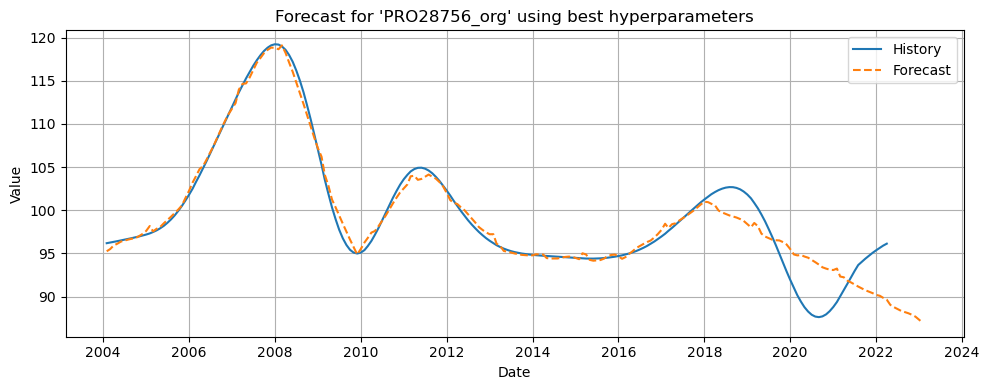

14:34:51 - cmdstanpy - INFO - Chain [1] start processing
14:34:51 - cmdstanpy - INFO - Chain [1] done processing


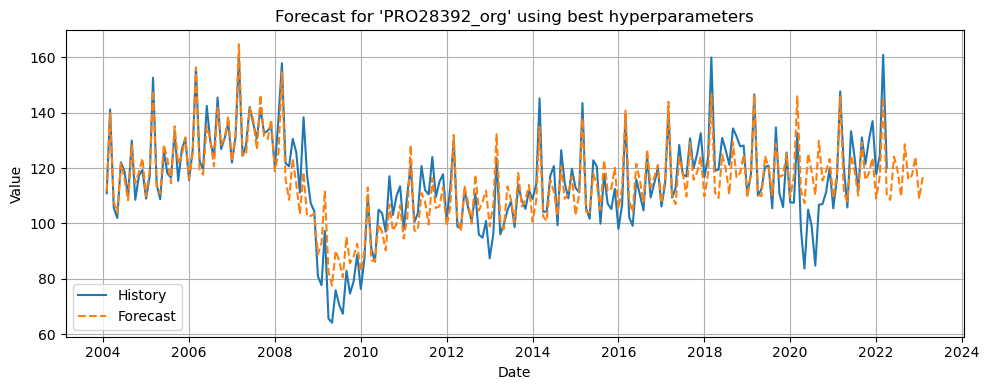

14:34:51 - cmdstanpy - INFO - Chain [1] start processing
14:34:51 - cmdstanpy - INFO - Chain [1] done processing


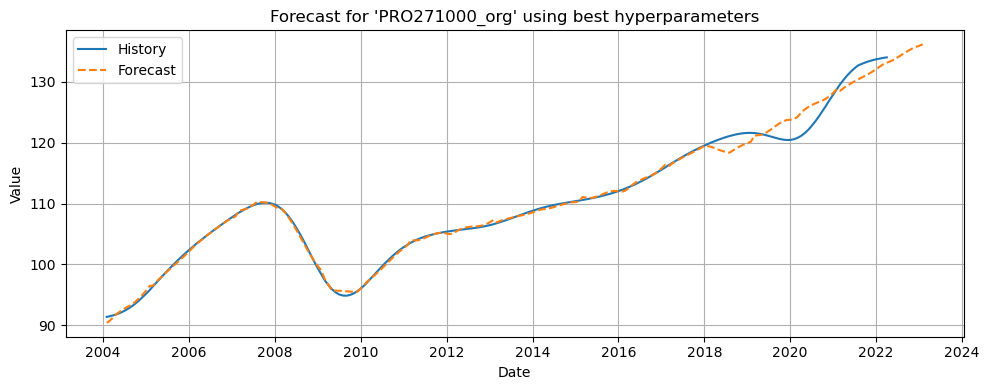

14:34:51 - cmdstanpy - INFO - Chain [1] start processing
14:34:51 - cmdstanpy - INFO - Chain [1] done processing


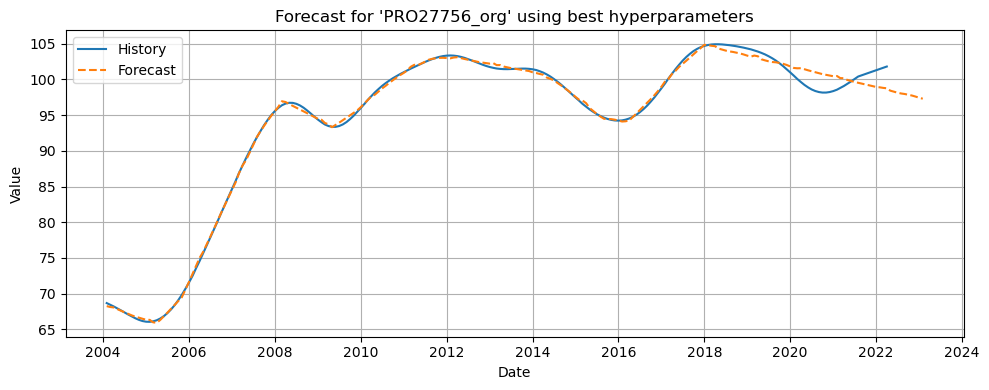

14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] done processing


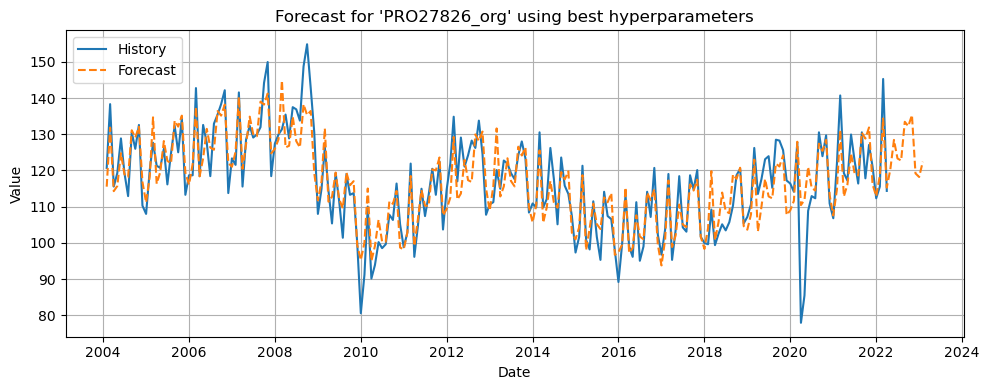

14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] done processing


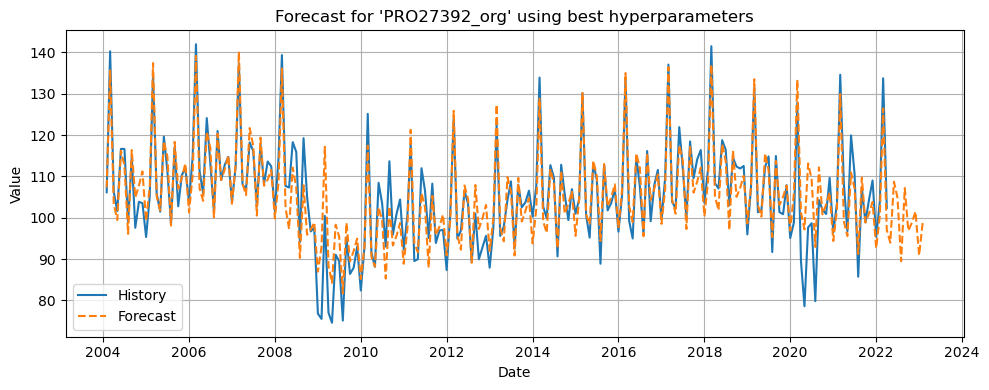

14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] done processing


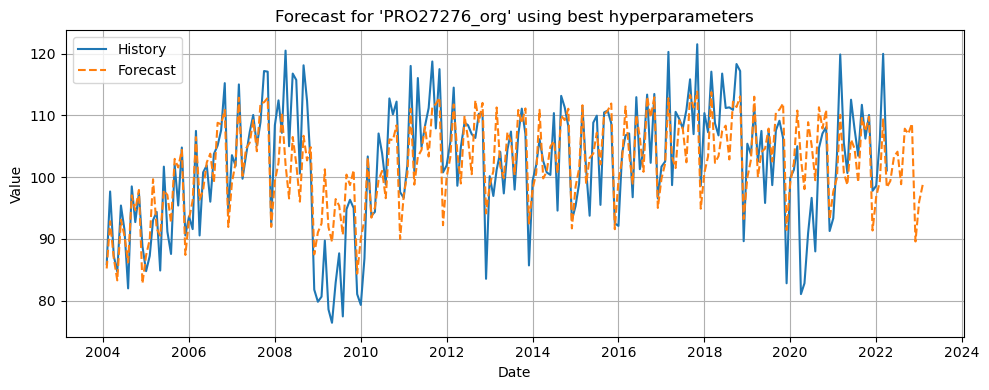

In [8]:
forecasts = specific_single_forecast_market_features_prophet(
    df_market, 
    best_params_dict=grid_search_results, 
    date_column='date', 
    forecast_horizon=10, 
    plot=True
)

In [9]:
extended_df = append_forecasts_to_market_df(df_market, forecasts, date_column='date')
extended_df.tail(15)

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_SHP250,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,...,PRI27380_org,PRI27250_org,PRI27276_org,PRO28756_org,PRO28392_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27392_org,PRO27276_org
214,2021-12-01,310.763183,310.763183,134.589504,127.771735,131.029703,97.290609,94.963776,101.273544,98.233705,...,113.309631,107.006989,115.748863,95.056728,136.975506,133.527660,101.137242,121.065762,109.005151,97.773956
215,2022-01-01,235.956129,235.956129,108.156320,110.460181,110.823532,97.547117,95.252047,95.003541,98.291641,...,115.390617,107.136619,117.853386,95.359690,117.861377,133.675526,101.313760,112.324119,95.369065,98.599052
216,2022-02-01,235.956129,235.956129,117.715770,117.879631,118.300232,97.787182,95.521098,98.458412,98.336496,...,116.431107,107.258155,118.905647,95.638921,124.710859,133.801232,101.486382,115.557330,103.950687,106.128059
217,2022-03-01,329.413367,329.413367,136.858720,152.000561,156.400634,98.009615,95.769697,121.993915,98.370613,...,117.471596,107.371066,119.852684,95.893397,160.954233,133.906950,101.653638,145.254965,133.743932,119.948433
218,2022-04-01,267.373145,267.373145,116.528738,114.262328,115.012049,98.213559,95.997003,95.266502,98.396144,...,118.408043,107.474967,121.220627,96.122675,120.098810,133.994879,101.813956,114.359844,102.361680,101.074341
219,2022-05-01,305.090426,305.090426,106.042023,103.884219,102.983505,92.487497,90.347045,98.767238,93.403307,...,111.992149,106.817699,115.876302,89.031458,108.512731,133.332867,98.433563,120.272367,93.959483,99.372203
220,2022-06-01,336.898824,336.898824,126.980699,119.237208,119.983726,92.270572,90.195088,107.672799,93.124726,...,112.207230,106.950518,115.989065,88.765163,124.115901,133.632946,98.282713,128.435891,108.691695,103.280574
221,2022-07-01,287.901363,287.901363,107.142529,114.748761,115.739227,92.089062,90.071133,100.841523,92.904604,...,112.334303,107.085863,116.182340,88.553110,119.228766,133.979386,98.151996,123.310960,104.861802,104.111939
222,2022-08-01,281.555253,281.555253,89.056202,103.200292,106.038894,91.903693,89.964946,94.790253,92.720332,...,112.545746,107.228470,116.308509,88.335527,109.801068,134.348998,98.039499,122.739750,89.471347,98.850408
223,2022-09-01,295.195250,295.195250,120.529755,121.724281,126.418340,91.782540,89.913249,108.062274,92.580983,...,112.643364,107.350974,116.457394,88.193619,128.617208,134.727104,97.965040,133.434415,107.185849,107.835521


In [10]:
extended_df.to_csv('../Data/Market_data_predicted.csv', index=False)